In [453]:
import pandas as pd
import plotnine as gg
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [454]:
import urllib.request
from bs4 import BeautifulSoup
import time
import re

url = 'http://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2017'  
html = urllib.request.urlopen(url)    
bsObj = BeautifulSoup(html,'lxml-xml')

In [455]:
href_list=bsObj.findAll('a', attrs={'href': re.compile(r"movies")})

In [456]:
Link=[]
for i in range(1,len(href_list)):
    m=href_list[i].attrs
    x=str(list(m.values())[0])
    y="http://www.boxofficemojo.com"+x
    z=y.replace('id',r'page=intl&country=CH&id')
    Link.append(z)

In [457]:
td_list=bsObj.find_all('td') 

In [458]:
data=[]
for td in td_list:
    l=[]
    for tr in td:
        l.append(tr.string)
    data.append(l)

In [459]:
import numpy as np
I = list(range(0,10))
data=np.delete(data, I).tolist()

In [460]:
Rank=[]
Title=[]
Studio=[]
Worldwide=[]
Domestic=[]
Overseas=[]
for i in range(len(data)):
    col=i%8
    x=data[i][0]
    if col==0:
        Rank.append(x)
    elif col==1:
        Title.append(x)
    elif col==2:
        Studio.append(x)
    elif col==3:
        Worldwide.append(x)
    elif col==4:
        Domestic.append(x)
    elif col==6:
        Overseas.append(x)
Rank.pop() 
Title.pop() 

In [461]:
import pandas as pd
dict={'Rank':Rank,
      'Title':Title,
      'Studio':Studio,
      'Worldwide':Worldwide,
      'Domestic':Domestic,
      'Overseas':Overseas,
      'Link':Link}

boxoffice = pd.DataFrame(dict)                   
boxoffice = boxoffice[['Rank', 'Title', 'Studio','Worldwide','Domestic','Overseas','Link']]
boxoffice.head()

,Rank,Title,Studio,Worldwide,Domestic,Overseas,Link
0,1,Star Wars: The Last Jedi,BV,"$1,331.7",$619.5,$712.2,http://www.boxofficemojo.com/movies/?page=intl...
1,2,Beauty and the Beast (2017),BV,"$1,263.5",$504.0,$759.5,http://www.boxofficemojo.com/movies/?page=intl...
2,3,The Fate of the Furious,Uni.,"$1,236.0",$226.0,"$1,010.0",http://www.boxofficemojo.com/movies/?page=intl...
3,4,Despicable Me 3,Uni.,"$1,034.8",$264.6,$770.2,http://www.boxofficemojo.com/movies/?page=intl...
4,5,Jumanji: Welcome to the Jungle,Sony,$936.7,$397.3,$539.4,http://www.boxofficemojo.com/movies/?page=intl...


In [462]:
Category=[]
for i in range(50):
    Category.append("Top1to50")
for i in range(50,100):
    Category.append("Top51to100")
for i in range(100,150):
    Category.append("Top101to150")
for i in range(150,200):
    Category.append("Top151to200")
for i in range(200,250):
    Category.append("Top201to250")
for i in range(250,306):
    Category.append("Top251to306")

In [463]:
boxoffice['Category']=Category

In [464]:
row=boxoffice.shape[0]
column=boxoffice.shape[1]

In [465]:
def ReplaceComma(colname):
    '''
    Replace','
    '''
    for i in range(row):
        x=boxoffice[colname][i]
        x=x.replace(',','')
        boxoffice[colname][i]=x 
    return

In [466]:
def DeleteDollar(colname):
    '''
    Delete'$'
    '''
    for i in range(row):
        x=boxoffice[colname][i]
        if x!="n/a":
            split1=re.split(r'[$]',x)
            boxoffice[colname][i]=split1[1] 
    return

In [467]:
def TurnToNum(colname):
    '''
    Turn 'k' into number, k=0.01
    '''
    for i in range(row):
        x=boxoffice[colname][i]
        if x!="n/a":
            if x.endswith("k"):
                split1=re.split(r'[k]',x)
                boxoffice[colname][i]=float(float(split1[0])*0.01)
    return

In [468]:
ReplaceComma("Domestic")
ReplaceComma("Worldwide")
ReplaceComma("Overseas")
DeleteDollar("Domestic")
DeleteDollar("Worldwide")
DeleteDollar("Overseas")
TurnToNum("Domestic")
TurnToNum("Worldwide")
TurnToNum("Overseas")

In [469]:
#Make sure all columns of numbers are numeric (not strings).
boxoffice.Worldwide =pd.to_numeric(boxoffice.Worldwide, errors='coerce').fillna(0).astype(float)
boxoffice.Domestic =pd.to_numeric(boxoffice.Domestic, errors='coerce').fillna(0).astype(float)
boxoffice.Overseas =pd.to_numeric(boxoffice.Overseas,errors='coerce').fillna(0).astype(float)

In [470]:
boxoffice.dtypes

Rank          object
Title         object
Studio        object
Worldwide    float64
Domestic     float64
Overseas     float64
Link          object
Category      object
dtype: object

In [471]:
boxoffice=boxoffice.round({'Worldwide': 1, 'Domestic': 1,'Overseas':1})

In [472]:
sum(boxoffice['Domestic'])/sum(boxoffice['Worldwide'])

0.35347960265870937

In [473]:
boxoffice

,Rank,Title,Studio,Worldwide,Domestic,Overseas,Link,Category
0,1,Star Wars: The Last Jedi,BV,1331.7,619.5,712.2,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
1,2,Beauty and the Beast (2017),BV,1263.5,504.0,759.5,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
2,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
3,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
4,5,Jumanji: Welcome to the Jungle,Sony,936.7,397.3,539.4,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
5,6,Spider-Man: Homecoming,Sony,880.2,334.2,546.0,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
6,7,Wolf Warrior 2,HC,870.3,2.7,867.6,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
7,8,Guardians of the Galaxy Vol. 2,BV,863.8,389.8,473.9,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
8,9,Thor: Ragnarok,BV,854.2,315.0,539.2,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50
9,10,Wonder Woman,WB,821.8,412.6,409.3,http://www.boxofficemojo.com/movies/?page=intl...,Top1to50


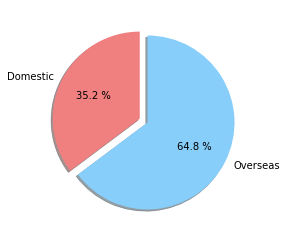

In [474]:
labels = 'Domestic', 'Overseas'
fracs = [sum(boxoffice['Domestic']),sum(boxoffice['Overseas'])]
explode = [0, 0.1]
plt.axes(aspect=1)  
colors = ['lightcoral', 'lightskyblue']
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170D6E582E8>,
      dtype=object)

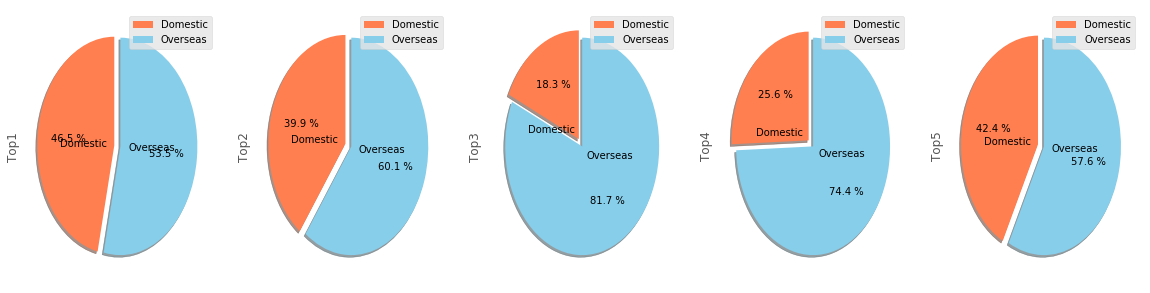

In [475]:
Top1to5=boxoffice.loc[0:4,['Domestic','Overseas']]
Top1to5.index = ['Top1','Top2','Top3','Top4','Top5']
Top1to5.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['coral', 'skyblue'],
                explode = (0.08, 0),shadow=True, labeldistance=0.1, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170D6BD9828>,
      dtype=object)

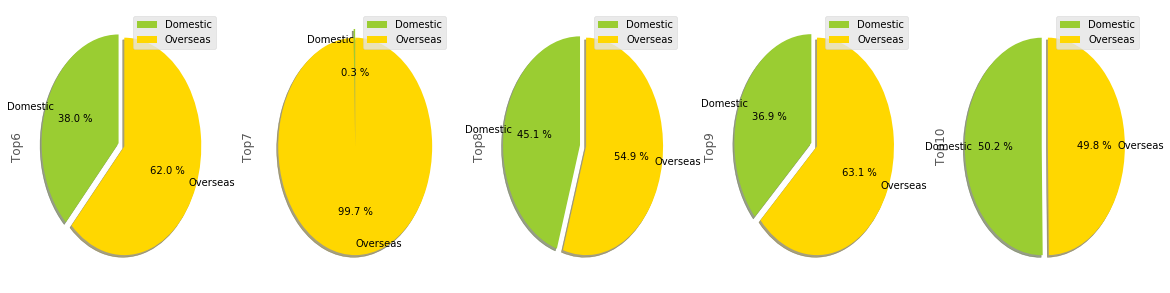

In [476]:
Top6to10=boxoffice.loc[5:9,['Domestic','Overseas']]
Top6to10.index = ['Top6','Top7','Top8','Top9','Top10']
Top6to10.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['yellowgreen', 'gold'],
                explode = (0.08, 0),shadow=True, labeldistance=0.9, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170D6A9ECC0>,
      dtype=object)

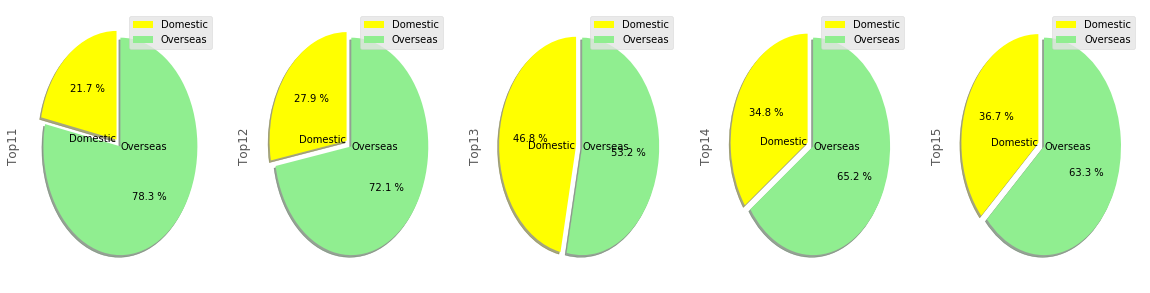

In [477]:
Top11to15=boxoffice.loc[10:14,['Domestic','Overseas']]
Top11to15.index = ['Top11','Top12','Top13','Top14','Top15']
Top11to15.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['yellow', 'lightgreen'],
                explode = (0.08, 0),shadow=True, labeldistance=0.01, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170DB5B8940>,
      dtype=object)

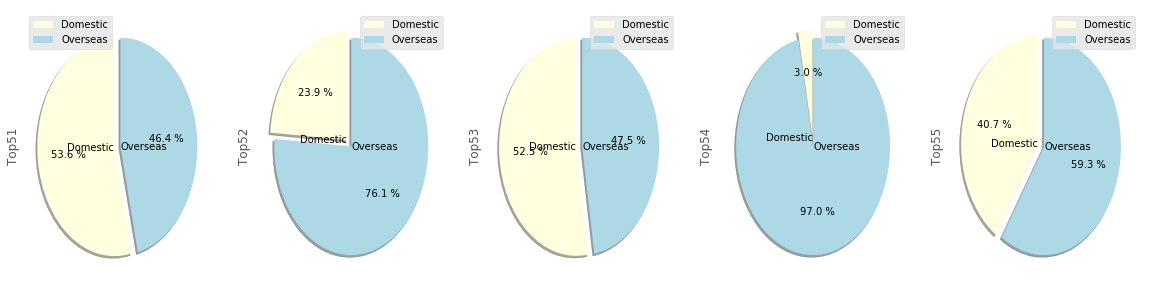

In [478]:
Top51to55=boxoffice.loc[50:54,['Domestic','Overseas']]
Top51to55.index = ['Top51','Top52','Top53','Top54','Top55']
Top51to55.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['lightyellow', 'lightblue'],
                explode = (0.08, 0),shadow=True, labeldistance=0.001, startangle = 90,pctdistance = 0.6)

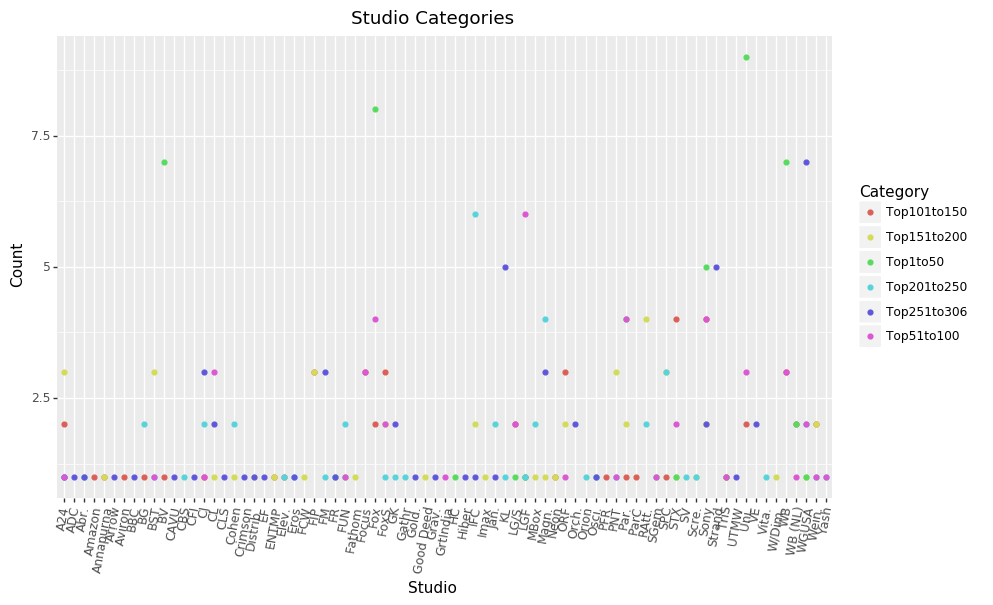

<ggplot: (-9223371937845169376)>

In [479]:
(gg.ggplot(boxoffice, gg.aes(x = "Studio", color = "Category")) + 
 gg.geom_point(stat = "count")+
 gg.theme(figure_size=(10, 6),axis_text_x=gg.element_text(rotation=80))+ 
 gg.labs(title = "Studio Categories", x = "Studio", y = "Count")
)

## Big Six
Hollywood has long been ruled by the ‘Big Six’. These ‘Big Six’ are: 20th Century Fox, Warner Bros., Paramount Pictures, Columbia Pictures, Universal Pictures & Walt Disney Pictures. 


Hollywood has long been ruled by the ‘Big Six’. These ‘Big Six’ are: 20th Century Fox, Warner Bros., Paramount Pictures, Columbia Pictures, Universal Pictures & Walt Disney Pictures. 

In [ ]:
Big6=boxoffice[(boxoffice['Studio']=='BV')|(boxoffice1['Studio']=='Fox')|
              (boxoffice1['Studio']=='Sony')|(boxoffice1['Studio']=='Par.')|
              (boxoffice1['Studio']=='Uni.')|(boxoffice1['Studio']=='WB')]

In [ ]:
(gg.ggplot(Big6, gg.aes(x = "Studio")) +
 gg.geom_bar(stat = "count",position='stack')+
 gg.labs(title = "Big Six Categories", x = "Studio", y = "Count")
)

In [ ]:
(gg.ggplot(Big6, gg.aes(x = "Studio", color = "Category")) + 
 gg.geom_point(stat = "count")+
 gg.labs(title = "Big Six Categories", x = "Studio", y = "Count")
)

In [ ]:
sum(Big6['Domestic'])/sum(boxoffice['Domestic'])

In [ ]:
sum(Big6['Overseas'])/sum(boxoffice['Overseas'])

In [ ]:
sum(Big6['Worldwide'])/sum(boxoffice['Worldwide'])

In [ ]:
boxoffice.groupby('Studio').sum().sort_values()

In [ ]:
boxoffice

In [ ]:
boxoffice['Dome_minus_Over']=(boxoffice['Overseas']-boxoffice['Domestic'])/boxoffice['Domestic']

In [ ]:
boxoffice=boxoffice[-boxoffice["Overseas"].isin(['n/a'])]
boxoffice=boxoffice[-boxoffice["Domestic"].isin(['n/a'])]

In [ ]:
boxoffice1=boxoffice[(boxoffice['Dome_minus_Over']>1)&(boxoffice['Dome_minus_Over']<60)]
boxoffice1.head()

Korea:CJ

In [ ]:
selected=set(boxoffice1['Studio'])
selected

In [ ]:
data=boxoffice1[(boxoffice1['Studio']=='Amazon')|(boxoffice1['Studio']=='BG')|
              (boxoffice1['Studio']=='BV')|(boxoffice1['Studio']=='Fox')|
              (boxoffice1['Studio']=='SGem')|(boxoffice1['Studio']=='STX')|
              (boxoffice1['Studio']=='Sony')|(boxoffice1['Studio']=='Par.')|
              (boxoffice1['Studio']=='Uni.')|(boxoffice1['Studio']=='WB')|
              (boxoffice1['Studio']=='WB (NL)')|(boxoffice1['Studio']=='Wein.')]
data=data.reset_index(drop=True) 
data.head()

Fifty Shades Darker wasn't on China.

In [ ]:
title=list(boxoffice1['Title'])
title

In [ ]:
data['Link'][13]='http://www.boxofficemojo.com/movies/?page=intl&country=CH&id=residentevil6.htm'
Chinese=[]
for i in range(len(data)):
    url=data['Link'][i]
    html = urllib.request.urlopen(url)    
    bsObj = BeautifulSoup(html,'lxml-xml')
    list1=bsObj.findAll('b')
    x=list1[14].text
    Chinese.append(x)
    
data['Chinese']=Chinese

In [ ]:
data

In [ ]:
data['Chinese'][26]='$5,770,423'
data=data[-data['Chinese'].isin(['Australia','Austria','India','Colombia','Belgium'])]
data=data.reset_index(drop=True) 

In [ ]:
data=data[-data['Chinese'].isin(['Australia'])]
data=data.reset_index(drop=True) 
data.head()

In [ ]:
row=data.shape[0]
column=data.shape[1]

In [ ]:
data

In [ ]:
for i in range(row):
    x=data['Chinese'][i]
    y=re.split(r'[$]',x)
    data['Chinese'][i]=y[1]

In [ ]:
data['Chinese']=data['Chinese'].str.replace(",","")

In [ ]:
data.Chinese =pd.to_numeric(data.Chinese, errors='coerce').fillna(0).astype(float)
data.Chinese=data.Chinese/1000000

In [ ]:
data.head()

In [ ]:
data['Chinese_minus_Domestic']=data['Chinese']-data['Domestic']

In [ ]:
columns = ['Link', 'Dome_minus_Over']
data.drop(columns, inplace=True, axis=1)

In [ ]:
data=data[data['Chinese_minus_Domestic']>0]

In [ ]:
data.head()

Kingsman: The Golden Circle was an British movie, The Great Wall and Journey to the West: The Demons Strike Back were directed by Chinese director, Valerian and the City of a Thousand Planets was a French movie. The Foreigner was a jointly Chinese and British movie. So we choose movies below.

In [ ]:
movie=data.iloc[[0,1,2,4,5,7,10,11],:]
movie=movie.reset_index(drop=True) 
movie

In [ ]:
boxoffice.round({'Chinese': 1, 'Chinese_minus_Domestic': 1})
movie.round({'Chinese': 1, 'Chinese_minus_Domestic': 1})

In [ ]:
boxoffice=boxoffice.drop('Link', 1)

In [ ]:
boxoffice=boxoffice.reset_index(drop=True) 

In [ ]:
movie=movie.reset_index(drop=True) 
writer = pd.ExcelWriter('boxoffice.xlsx', engine='xlsxwriter')
boxoffice.to_excel(writer,sheet_name='boxoffice')
movie.to_excel(writer,sheet_name='selected')
writer.save()